Viết mô hình hồi quy tuyến tính tổng thể biểu diễn valueformoney (Y) theo
atmosphere (X).

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


In [2]:
%cd Du_Lieu_Thuc_Hanh_MA239/

c:\Thuc_hanh_xstk\Du_Lieu_Thuc_Hanh_MA239


C:\Users\Kiet\AppData\Roaming\Python\Python311\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [ ]:

# Mô hình hồi quy tổng thể:
# Y = B1 + B2*X + U

In [4]:
ht = pd.read_csv('hostel.csv')
ht.head()

,Unnamed: 0.1,Unnamed: 0,hostel_name,City,price_from,Distance,summary_score,rating_band,atmosphere,cleanliness,facilities,location_y,security,staff,valueformoney,lon,lat
0,0,1,"""Bike & Bed"" CharinCo Hostel",Osaka,3300,2.9km from city centre,9.2,Superb,8.9,9.4,9.3,8.9,9.0,9.4,9.4,135.513767,34.682678
1,2,3,&And Hostel Akihabara,Tokyo,3600,7.8km from city centre,8.7,Fabulous,8.0,7.0,9.0,8.0,10.0,10.0,9.0,139.777472,35.697447
2,3,4,&And Hostel Ueno,Tokyo,2600,8.7km from city centre,7.4,Very Good,8.0,7.5,7.5,7.5,7.0,8.0,6.5,139.783667,35.712716
3,4,5,&And Hostel-Asakusa North-,Tokyo,1500,10.5km from city centre,9.4,Superb,9.5,9.5,9.0,9.0,9.5,10.0,9.5,139.798371,35.727898
4,5,6,1night1980hostel Tokyo,Tokyo,2100,9.4km from city centre,7.0,Very Good,5.5,8.0,6.0,6.0,8.5,8.5,6.5,139.786950,35.724384


In [24]:
# Viết mô hình hồi quy tuyến tính tổng thể biểu diễn valueformoney (Y) theo
# atmosphere (X).
chinh = sm.add_constant(ht['atmosphere'])
model = sm.OLS(ht['valueformoney'], chinh).fit()
model.summary()
# chinh


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          valueformoney   R-squared:                       0.566
Model:                            OLS   Adj. R-squared:                  0.565
Method:                 Least Squares   F-statistic:                     386.1
Date:                Fri, 31 May 2024   Prob (F-statistic):           1.34e-55
Time:                        09:13:38   Log-Likelihood:                -300.73
No. Observations:                 298   AIC:                             605.5
Df Residuals:                     296   BIC:                             612.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8790      0.257     15.099      0.000       3.373       4.385
atmosphere     0.5995      0.031     19.650      0.000       0.539       0.659
==============================================================================
Omnibus:                       66.955   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              435.745
Skew:                          -0.714   Prob(JB):                     2.39e-95
Kurtosis:                       8.749   Cond. No.                         56.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#  Ước lượng mô hình hồi quy câu (a) (mô hình hồi quy mẫu) và nêu ý nghĩa của
# hệ số góc.
# Y = 3,8790 + 0.5995*X + e 
# Khi điểm  đánh giá về môi trường tăng thêm 1 đơn thì trung bình điểm đánh giá giá trị tiền bỏ tăng thêm 0.5995 điểm

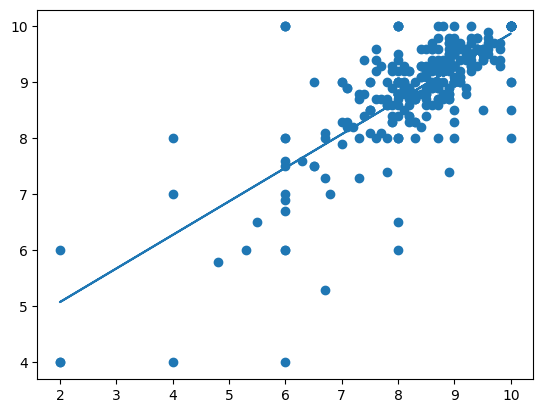

In [15]:
# câu c
bieudotanxa = plt.scatter(ht.atmosphere, ht.valueformoney)
# Vẽ biểu đồ tán xạ và đường hồi quy tuyến tính mẫu trên cùng một biểu đồ và
# đưa ra nhận xét.
a , b = np.polyfit(ht.atmosphere, ht.valueformoney, 1)
plt.plot(ht.atmosphere, a*ht.atmosphere + b)



In [ ]:
# Kiểm định tại mức ý nghĩa α = 5% xem biến atmosphere có ảnh hưởng có ý
# nghĩa đến biến valueformoney) không?
# Mô hình hồi quy tổng thể:
# Y = B1 + B2*X + U
# Kiểm định cặp giả thuyết
# H0: B2 = 0 (Mô hình không có ý nghĩa)
# H1: B2 # 0 (Mô hình có ý nghĩa)
# 	coef	std err	t	P>|t|	[0.025	0.975]
# const	3.8790	0.257	15.099	0.000	3.373	4.385
# atmosphere	0.5995	0.031	19.650	0.000	0.539	0.659



# Ta có p-giá trị < 0.001 < 0.05 nên bác bỏ H0, hay mô hình có ý nghĩa

In [19]:
# e. Tìm khoảng tin cậy 90% cho hệ số góc của mô hình trong câu (a).
model.conf_int(0.90) 
# 	0	1
# const	3.846696	3.911316
# atmosphere	0.595622	0.60329
# Vậy khoảng tin cậy 90% cho hệ số góc là [0.595622  ,0.603295]

,0,1
const,3.846696,3.911316
atmosphere,0.595622,0.603295


In [ ]:
# f. Một nhà nghỉ có điểm đánh giá môi trường X = 9.1. Đưa ra giá trị dự báo cho
# điểm đánh giá số tiền bỏ ra xứng đáng valueformoney (Y) của nhà nghỉ này

In [23]:
model.predict([1,9.1])

array([9.33407714])

Tính hệ số xác định của mô hình hồi quy trên và nêu ý nghĩa


In [ ]:
# Dep. Variable:	valueformoney	R-squared:	0.566
# Hệ số xác định của mô hình (R^2 ) = 0.566


# Nhận xét
# Hệ số xác định R^2 = 0.566 cho thấy mô hình hồi quy đơn (Y chỉ theo X) phù hợp ở mức độ trung bình so với với tập số liệu
# 56.6% sự biến động của Y được giải thích qua biến X từ mô hình